# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Imanuel Uneputty
- **Email:** imanueluneputty121103@gmail.com
- **ID Dicoding:** imanuel_uneputyy_m012d4ky3208_CUgD

## Menentukan Pertanyaan Bisnis


- Bagaimana performa peminjaman sepeda di Tahun 2012?
- Bagaimana performa peminjaman sepeda dalam workingday dan holiday?

## Import Semua Packages/Library yang Digunakan

In [192]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install streamlit
import streamlit as st

## Data Wrangling

### Gathering Data

**Memasukkan semua data yang dibutuhkan**

In [193]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [194]:
day_df = pd.read_csv('/content/drive/MyDrive/Bike Dataset/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [195]:
hour_df = pd.read_csv('/content/drive/MyDrive/Bike Dataset/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

**MENILAI DATA**

In [196]:
f"{day_df.info()}"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


'None'

In [197]:
f"{hour_df.info()}"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


'None'

Dari hasil penilaian data di atas terdapat data yang memiliki tipe data tidak sesuai :
1.   dteday(object) -> datetime

Kita juga perlu menangani inaccurate value, seperti :
1.   season
2.   year
3.   workingday

Berdasarkan file readme :

season : season (1:springer, 2:summer, 3:fall, 4:winter)

yr : year (0: 2011, 1:2012)

workingday : Jika weekday = 0, jika holiday = 1




**MENGECEK ADA BERAPA DATA YANG NULL**

In [198]:
print(f"Info null data day: {day_df.isnull().sum()}\n")
print(f"Info null data hour: {hour_df.isnull().sum()}")

Info null data day: instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Info null data hour: instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Dari hasil pengecekan tidak terdapat data null

**MENGECEK DUPLIKASI DATA**

In [199]:
print(f"Info duplikat data day: {day_df.duplicated().sum()}\n")
print(f"Info duplikat data hour: {hour_df.duplicated().sum()}")

Info duplikat data day: 0

Info duplikat data hour: 0


Dari hasil pengecekan tidak terdapat data yang duplikat

**MELIHAT RANGKUMAN PARAMETER STATISTIK**

In [200]:
print(f'Describe day_df: \n{day_df.describe(include="all")}\n')

Describe day_df: 
           instant      dteday      season          yr        mnth  \
count   731.000000         731  731.000000  731.000000  731.000000   
unique         NaN         731         NaN         NaN         NaN   
top            NaN  2011-01-01         NaN         NaN         NaN   
freq           NaN           1         NaN         NaN         NaN   
mean    366.000000         NaN    2.496580    0.500684    6.519836   
std     211.165812         NaN    1.110807    0.500342    3.451913   
min       1.000000         NaN    1.000000    0.000000    1.000000   
25%     183.500000         NaN    2.000000    0.000000    4.000000   
50%     366.000000         NaN    3.000000    1.000000    7.000000   
75%     548.500000         NaN    3.000000    1.000000   10.000000   
max     731.000000         NaN    4.000000    1.000000   12.000000   

           holiday     weekday  workingday  weathersit        temp  \
count   731.000000  731.000000  731.000000  731.000000  731.000000   
u

In [201]:
print(f'Describe hour_df: \n{hour_df.describe(include="all")}')

Describe hour_df: 
           instant      dteday        season            yr          mnth  \
count   17379.0000       17379  17379.000000  17379.000000  17379.000000   
unique         NaN         731           NaN           NaN           NaN   
top            NaN  2011-01-01           NaN           NaN           NaN   
freq           NaN          24           NaN           NaN           NaN   
mean     8690.0000         NaN      2.501640      0.502561      6.537775   
std      5017.0295         NaN      1.106918      0.500008      3.438776   
min         1.0000         NaN      1.000000      0.000000      1.000000   
25%      4345.5000         NaN      2.000000      0.000000      4.000000   
50%      8690.0000         NaN      3.000000      1.000000      7.000000   
75%     13034.5000         NaN      3.000000      1.000000     10.000000   
max     17379.0000         NaN      4.000000      1.000000     12.000000   

                  hr       holiday       weekday    workingday    we

### Cleaning Data

1. Mengganti value dari season, year, workingday, dan weekday

2. Menghapus kolom holiday

3. Mengganti tipe data dteday menjadi datetime.

In [202]:
day_df['season'].replace({1: 'Springer', 2: 'Summer', 3: 'Fall', 4: 'Winter'}, inplace=True)
day_df['yr'].replace({0: 2011, 1: 2012}, inplace=True)
day_df['workingday'].replace({0: 'Holiday', 1: 'Weekday'}, inplace=True)
day_df['weekday'].replace({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'},inplace=True)
day_df['mnth'].replace({1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June", 7: "July",8 : "August", 9:"September", 10: "October", 11: "November", 12: "Desember"}, inplace=True)
day_df.drop('holiday', axis=1, inplace=True)
day_df.head()

,instant,dteday,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,2011,January,Saturday,Holiday,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Springer,2011,January,Sunday,Holiday,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Springer,2011,January,Monday,Weekday,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Springer,2011,January,Tuesday,Weekday,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Springer,2011,January,Wednesday,Weekday,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [203]:
day_df['dteday'] = pd.to_datetime(day_df["dteday"])

In [204]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    object        
 5   weekday     731 non-null    object        
 6   workingday  731 non-null    object        
 7   weathersit  731 non-null    int64         
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(6), object(4)
memory usage: 85.8+ 

## Exploratory Data Analysis (EDA)

### Explore ...

1. Melihat performa peminjaman sepeda di tahun 2012

2. Melihat performa peminjaman sepeda dalam workingday dan holiday.

3. Melihat seberapa sering pelanggan dengan kategori registered melakkan peminjaman sepeda.


In [205]:
day_df[day_df['yr'] == 2012].groupby(by='mnth').agg({
    'cnt': 'sum'
})

,cnt
mnth,
April,174224
August,214503
Desember,123713
February,103137
January,96744
July,203607
June,202830
March,164875
May,195865


Dari hasil eksplor, bulan september adalah bulan yang paling banyak terjadi peminjaman sepeda.

In [206]:
day_df.groupby(by=['workingday']).agg({
    'cnt' : "sum"
})

,cnt
workingday,
Holiday,1000269
Weekday,2292410


Dari hasil ekplor, Weekday memiliki jumlah peminjaman sepeda yang lebih banyak.

In [207]:
day_df.groupby(by=['workingday']).agg({
    'casual' : "sum",
    'registered' : "sum"
})

,casual,registered
workingday,,
Holiday,316732,683537
Weekday,303285,1989125


Dari hasil eksplor saat holiday dan juga weekday, customer yang lebih banyak meminjam sepeda adalah jenis customer registered

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa peminjaman sepeda di tahun 2012

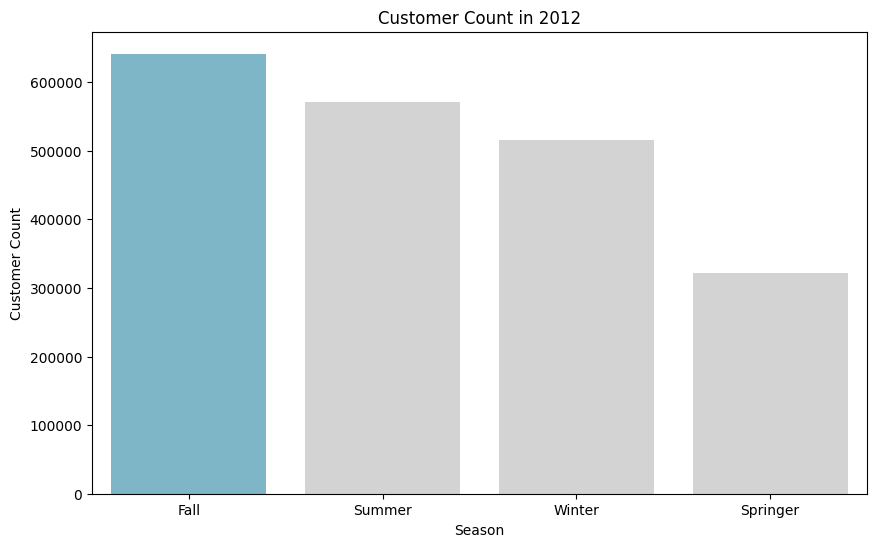

In [208]:
customer_in_2012_df = day_df[day_df['yr'] == 2012].groupby("season").cnt.sum().sort_values(ascending=False).reset_index()
fig = plt.subplots(figsize=(10, 6))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(x='season', y='cnt', data=customer_in_2012_df, hue='season', palette=colors)
plt.title("Customer Count in 2012")
plt.ylabel("Customer Count")
plt.xlabel("Season")
plt.show()

Terlihat dari barchart di atas, season yang paling banyak terjadi peminjaman sepeda pada tahun 2012 adalah season Fall

### Pertanyaan 2: Bagaimana performa peminjaman sepeda dalam workingday dan holiday?

<ipython-input-209-219d28ca230a>:3: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.barplot(x='workingday', y='cnt', data=compare_working_and_holiday_df, hue='workingday', palette=colors)


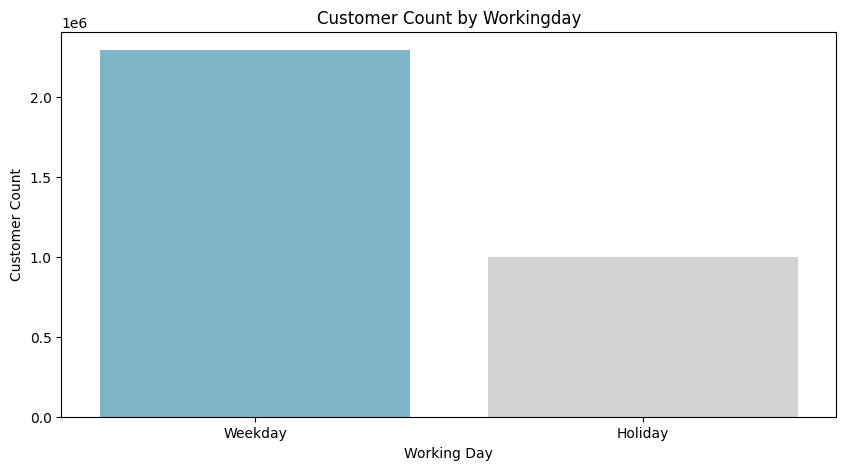

In [209]:
compare_working_and_holiday_df = day_df.groupby("workingday").cnt.sum().sort_values(ascending=False).reset_index()
fig = plt.subplots(figsize=(10, 5))
sns.barplot(x='workingday', y='cnt', data=compare_working_and_holiday_df, hue='workingday', palette=colors)
plt.title("Customer Count by Workingday")
plt.ylabel("Customer Count")
plt.xlabel("Working Day")
plt.show()

Terlihat dari barchart diatas weekday memiliki jumlah peminjaman yang paling banyak di bandingkan dengan holiday.

## Conclusion

- Dari barchart yang ditampilkan terhlihat bahwa musim Fall (Gugur) menjadi musim yang paling digemari untuk bersepeda
- Dari barchart yang ditampilkan terlihat bahwa, sepeda lebih sering dipinjam saat hari kerja. Hal ini bisa terjadi karena para pelanggan menggunakannya untuk beraktivitas, seperti sekolah atau berangkat kerja.